In [1]:
import numpy as np
import matplotlib.pyplot as myPlot
import pandas as pd

In [2]:
myData = pd.read_csv('.\\datasets\\Temperature_VaporPressure.csv')
myData.head(2)

,Temperature,Vapor_Pressure
0,273,4.7
1,283,9.3


In [3]:
X = myData.iloc[:, :1].values
X

array([[273],
       [283],
       [293],
       [303],
       [313],
       [323],
       [333],
       [343],
       [353],
       [363],
       [373]], dtype=int64)

In [4]:
y = myData.iloc[:, 1].values
y

array([  4.7,   9.3,  17.6,  31.7,  55.2,  92.7, 149.2, 233.7, 355.2,
       525.6, 760. ])

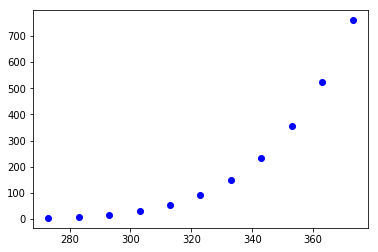

In [5]:
myPlot.scatter(X,y, color='b')
myPlot.show()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
myModel_linear = LinearRegression().fit(X,y)

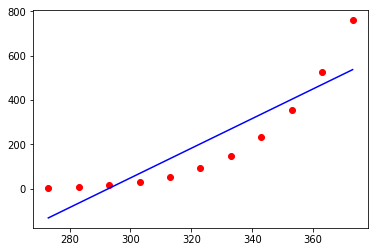

In [8]:
myPlot.scatter(X,y, color='r')
myPlot.plot(X,myModel_linear.predict(X), color='b')
myPlot.show()

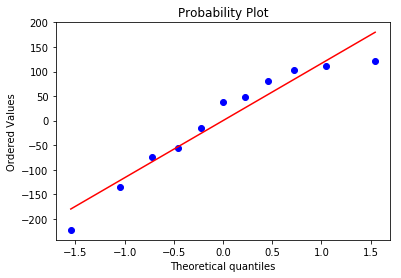

In [9]:
#Normality test of residual
from scipy import stats as mystats
res = myModel_linear.predict(X) -y
mystats.probplot(res,plot=myPlot)
myPlot.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X)
X_poly  #Q0 * X0: where X0 is 1, then Q1 * X1: where X1 is X, Q2 * X2: where X2 is X**2

array([[1.00000e+00, 2.73000e+02, 7.45290e+04],
       [1.00000e+00, 2.83000e+02, 8.00890e+04],
       [1.00000e+00, 2.93000e+02, 8.58490e+04],
       [1.00000e+00, 3.03000e+02, 9.18090e+04],
       [1.00000e+00, 3.13000e+02, 9.79690e+04],
       [1.00000e+00, 3.23000e+02, 1.04329e+05],
       [1.00000e+00, 3.33000e+02, 1.10889e+05],
       [1.00000e+00, 3.43000e+02, 1.17649e+05],
       [1.00000e+00, 3.53000e+02, 1.24609e+05],
       [1.00000e+00, 3.63000e+02, 1.31769e+05],
       [1.00000e+00, 3.73000e+02, 1.39129e+05]])

In [13]:
myModel_poly = LinearRegression().fit(X_poly,y)

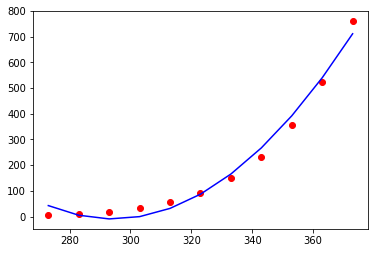

In [14]:
myPlot.scatter(X,y, color='r')
myPlot.plot(X,myModel_poly.predict(X_poly), color='b')
myPlot.show()

In [15]:
X_poly = PolynomialFeatures(degree=3)
X_fet = X_poly.fit_transform(X)
X_fet

array([[1.0000000e+00, 2.7300000e+02, 7.4529000e+04, 2.0346417e+07],
       [1.0000000e+00, 2.8300000e+02, 8.0089000e+04, 2.2665187e+07],
       [1.0000000e+00, 2.9300000e+02, 8.5849000e+04, 2.5153757e+07],
       [1.0000000e+00, 3.0300000e+02, 9.1809000e+04, 2.7818127e+07],
       [1.0000000e+00, 3.1300000e+02, 9.7969000e+04, 3.0664297e+07],
       [1.0000000e+00, 3.2300000e+02, 1.0432900e+05, 3.3698267e+07],
       [1.0000000e+00, 3.3300000e+02, 1.1088900e+05, 3.6926037e+07],
       [1.0000000e+00, 3.4300000e+02, 1.1764900e+05, 4.0353607e+07],
       [1.0000000e+00, 3.5300000e+02, 1.2460900e+05, 4.3986977e+07],
       [1.0000000e+00, 3.6300000e+02, 1.3176900e+05, 4.7832147e+07],
       [1.0000000e+00, 3.7300000e+02, 1.3912900e+05, 5.1895117e+07]])

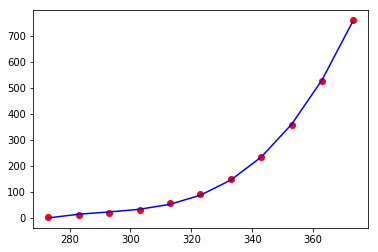

In [16]:
myModel_poly = LinearRegression().fit(X_fet,y)
myPlot.scatter(X,y, color='r')
myPlot.plot(X,myModel_poly.predict(X_fet), color='b')
myPlot.show()

In [17]:
#How to predict value for a specific data point?
#First convert data point to array of polynomial 
X_poly.transform([[359]])

array([[1.0000000e+00, 3.5900000e+02, 1.2888100e+05, 4.6268279e+07]])

In [18]:
#Then, put the data into model for prediction
myModel_poly.predict(X_poly.transform([[359]]))

array([457.22993979])